  ###  🔍Proje Amacı: Kredi Kartı Dolandırıcılığı Tespiti 💳🛡️
 
 Bu projenin amacı, kredi kartı dolandırıcılığı tespitinde kullanılabilecek bir makine öğrenmesi modeli geliştirmektir. Kredi kartı işlemlerinin büyük çoğunluğu güvenli olsa da, dolandırıcılık durumları hem bankalar hem de kullanıcılar için önemli bir mali risk oluşturur. Bu çalışmada, dengesiz veri seti yapısıyla başa çıkmak için uygun teknikleri kullanarak dolandırıcılık tespit etmeyi amaçlıyoruz.
 
 Özellikle şu adımları gerçekleştireceğiz:
 
 *  Verinin keşfi ve ön işlenmesi,  
 *  Dengesiz veri sorununu çözmek için SMOTE gibi yöntemlerin uygulanması,  
 *  Çeşitli makine öğrenmesi modellerinin kullanılması ve performanslarının değerlendirilmesi.  
 
Sonuç olarak, doğru ve etkin bir dolandırıcılık tespiti modeli geliştirerek bu tür vakaların önlenmesine katkı sağlamayı hedefliyoruz.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/tmp/ipykernel_17/835355342.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Density'>

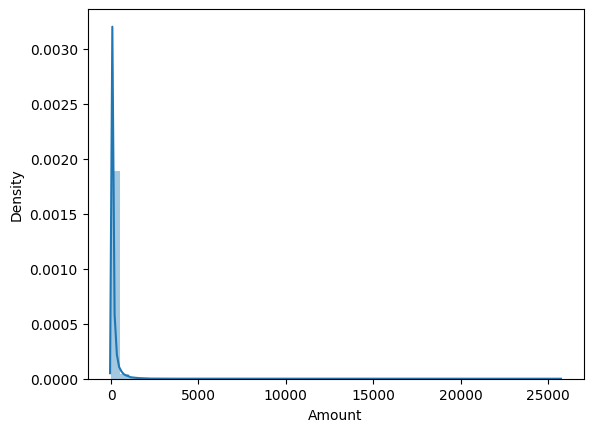

In [8]:
sns.distplot(df['Amount']) 

/tmp/ipykernel_17/3310184253.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Density'>

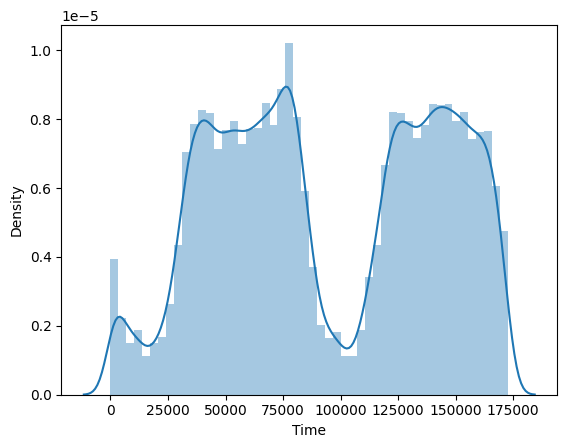

In [9]:
sns.distplot(df['Time']) 

<Axes: >

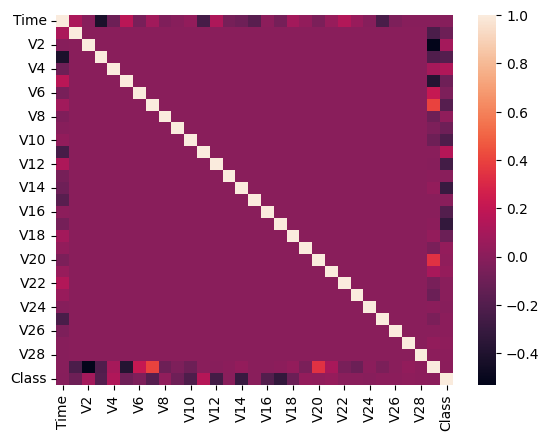

In [10]:
sns.heatmap(data = df.corr())

<Axes: xlabel='Class', ylabel='count'>

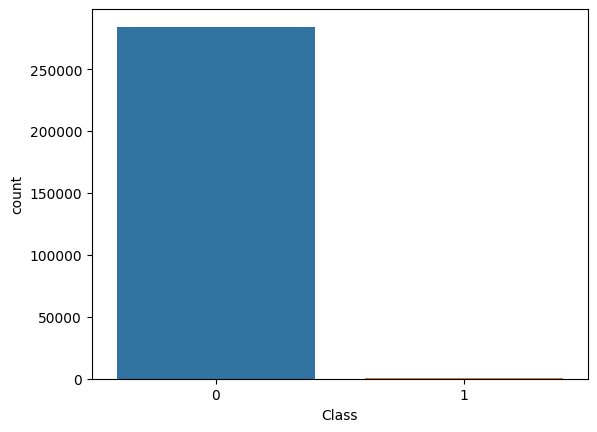

In [11]:
sns.countplot(x = 'Class',data =df )

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
(y_train_smote ==1).sum()

199008

In [14]:
(y_train_smote ==0).sum()

199008

In [15]:
y_train_smote

0         0
1         0
2         0
3         0
4         0
         ..
398011    1
398012    1
398013    1
398014    1
398015    1
Name: Class, Length: 398016, dtype: int64

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995552590615966
Confusion Matrix:
 [[85286    21]
 [   17   119]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Hiperparametre arama uzayını daralt
param_dist = {
    'n_estimators': [50, 100],          # Ormandaki ağaç sayısı
    'max_depth': [10, 20],              # Ağacın maksimum derinliği
    'min_samples_split': [2, 5],        # Bir iç düğümü bölmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2],         # Bir yaprak düğümünde bulunması gereken minimum örnek sayısı
    'max_features': ['sqrt', 'log2'],   # En iyi bölmeyi ararken göz önünde bulundurulacak özellik sayısı
    'bootstrap': [True, False],         # Ağaçları oluştururken önyükleme örneklerinin kullanılıp kullanılmayacağı
    'criterion': ['gini', 'entropy'],   # Bölmenin kalitesini ölçmek için kullanılacak fonksiyon
    'random_state': [42]                # Yeniden üretilebilirlik için rastgelelik
}

# RandomForestClassifier'ı başlat
rf = RandomForestClassifier()

# RandomizedSearchCV'yi kur
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Modeli eğit
random_search.fit(X_train_smote, y_train_smote)

# En iyi parametreleri ve en iyi F1 skorunu yazdır
print("En İyi Parametreler:", random_search.best_params_)
print("En İyi F1 Skoru (Eğitim Seti):", random_search.best_score_)

# Test kümesi üzerinde tahmin yap
y_pred = random_search.best_estimator_.predict(X_test)

# Performans metriklerini yazdır
print("Test Seti F1 Skoru:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42; total time= 2.7min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42; total time= 3.0min
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time= 6.0min
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42; total time= 4.7min
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42; total time= 6.9min
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_le

In [18]:

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_recall = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=cv, scoring='recall')

print("Cross-Validation Recall Scores:", cv_scores_recall)
print("Mean CV Recall:", np.mean(cv_scores_recall))

Cross-Validation Recall Scores: [1. 1. 1. 1. 1.]
Mean CV Recall: 1.0


In [19]:
xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)

print("Test Seti Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Seti Recall: 0.8676470588235294
Confusion Matrix:
 [[85256    51]
 [   18   118]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.87      0.77       136

    accuracy                           1.00     85443
   macro avg       0.85      0.93      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test)

print("Optimized Test Seti Recall:", recall_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Optimized Test Seti Recall: 0.875
Confusion Matrix:
 [[85273    34]
 [   17   119]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.88      0.82       136

    accuracy                           1.00     85443
   macro avg       0.89      0.94      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## 📈 Proje Sonuçları ve Öğrenilenler: Kredi Kartı Dolandırıcılığı Tespiti 🚨📊

 Bu proje kapsamında, kredi kartı dolandırıcılığı veri seti üzerinde yapılan analizler ve modelleme süreci sonucunda şu bulgular elde edilmiştir:

1.     Veri Dengesizliği ile Başa Çıkma: Verinin büyük bir kısmı normal işlemlerden oluştuğundan, dolandırıcılık işlemleri oldukça azdı. SMOTE gibi tekniklerle bu dengesiz veri seti üzerinde başarılı bir dengeleme sağlandı.
2.     Model Performansları: Farklı algoritmalar ( Random Forest, XGBoost) kullanılarak dolandırıcılık tespiti üzerine  modeller geliştirildi. Her bir modelin doğruluk, hassasiyet, geri çağırma gibi metriklerle performansı değerlendirildi.
3.     Sonuçlar ve İyileştirme Önerileri: Sonuçlar, dolandırıcılık tespiti için kullanılabilecek modellerin etkin olduğunu gösterdi. Ancak, gelecekte daha fazla veri ve daha gelişmiş modellerle performans iyileştirilebilir. Ayrıca, yanlış pozitiflerin azaltılması üzerine çalışmalar yapılabilir.

Bu çalışma, kredi kartı dolandırıcılığı tespiti konusunda önemli içgörüler sundu ve makine öğrenmesi algoritmalarının bu alanda nasıl kullanılabileceğini gösterdi.